<a href="https://colab.research.google.com/github/Vaibhav0000/healthcare-bi-project/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Vaibhav0000/healthcare-bi-project/main/Drug_Use_Data_from_Selected_Hospitals.csv"
hospital_url = "https://raw.githubusercontent.com/Vaibhav0000/healthcare-bi-project/main/Hospital_General_Information.csv"

hospital_df = pd.read_csv(hospital_url)
drug_df = pd.read_csv(url)

hospital_df.head()
drug_df.head()

print("Drug Data Columns:", drug_df.columns.tolist())
print("Hospital Data Columns:", hospital_df.columns.tolist())

Drug Data Columns: ['FIGURE', 'SETTING', 'INDICATOR', 'GROUP', 'SUBGROUP', 'TIME', 'START_TIME', 'END_TIME', 'VALUE', 'MEASURE']
Hospital Data Columns: ['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for birthing friendly designation', 'Hospital overall rating', 'Hospital overall rating footnote', 'MORT Group Measure Count', 'Count of Facility MORT Measures', 'Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse', 'MORT Group Footnote', 'Safety Group Measure Count', 'Count of Facility Safety Measures', 'Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse', 'Safety Group Footnote', 'READM Group Measure Count', 'Count of Facility READM Measures', 'Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures W

In [ ]:
print(drug_df.head(10))
print(drug_df.columns)
print(drug_df['SETTING'].unique())

   FIGURE SETTING INDICATOR GROUP SUBGROUP  TIME  START_TIME    END_TIME  \
0       0      IP       NaN   NaN      NaN     1  01/01/2023  01/31/2023   
1       0      IP       NaN   NaN      NaN     2  02/01/2023  02/28/2023   
2       0      IP       NaN   NaN      NaN     3  03/01/2023  03/31/2023   
3       0      IP       NaN   NaN      NaN     4  04/01/2023  04/30/2023   
4       0      IP       NaN   NaN      NaN     5  05/01/2023  05/31/2023   
5       0      IP       NaN   NaN      NaN     6  06/01/2023  06/30/2023   
6       0      IP       NaN   NaN      NaN     7  07/01/2023  07/31/2023   
7       0      IP       NaN   NaN      NaN     8  08/01/2023  08/31/2023   
8       0      IP       NaN   NaN      NaN     9  09/01/2023  09/30/2023   
9       0      IP       NaN   NaN      NaN    10  10/01/2023  10/31/2023   

     VALUE MEASURE  
0  57172.0   Count  
1  51983.0   Count  
2  58176.0   Count  
3  54751.0   Count  
4  57462.0   Count  
5  56642.0   Count  
6  57015.0   Cou

In [ ]:
import numpy as np

# Add a fake hospital name column to simulate
fake_names = np.random.choice(hospital_df['Facility Name'].unique(), size=len(drug_df))
drug_df['Hospital Name'] = fake_names

In [ ]:
merged_df = pd.merge(drug_df, hospital_df, left_on='Hospital Name', right_on='Facility Name', how='left')
merged_df.head()

,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,...,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,0,IP,NaN,NaN,NaN,1,01/01/2023,01/31/2023,57172.0,Count,...,Not Available,Not Available,Not Available,19.0,Not Available,Not Available,19.0,Not Available,Not Available,19.0
1,0,IP,NaN,NaN,NaN,2,02/01/2023,02/28/2023,51983.0,Count,...,0,7,0,NaN,8,8,NaN,12,9,NaN
2,0,IP,NaN,NaN,NaN,3,03/01/2023,03/31/2023,58176.0,Count,...,0,6,0,NaN,8,8,NaN,12,10,NaN
3,0,IP,NaN,NaN,NaN,4,04/01/2023,04/30/2023,54751.0,Count,...,0,4,0,NaN,8,Not Available,5.0,12,7,NaN
4,0,IP,NaN,NaN,NaN,5,05/01/2023,05/31/2023,57462.0,Count,...,1,3,0,NaN,8,8,NaN,12,6,NaN


In [ ]:
# Check for missing values in both datasets
print("Drug Data Missing:\n", drug_df.isnull().sum())
print("\nHospital Data Missing:\n", hospital_df.isnull().sum())


Drug Data Missing:
 FIGURE            0
SETTING           0
INDICATOR        48
GROUP            48
SUBGROUP         48
TIME              0
START_TIME        0
END_TIME          0
VALUE             0
MEASURE           0
Hospital Name     0
dtype: int64

Hospital Data Missing:
 Facility ID                                            0
Facility Name                                          0
Address                                                0
City/Town                                              0
State                                                  0
ZIP Code                                               0
County/Parish                                          0
Telephone Number                                       0
Hospital Type                                          0
Hospital Ownership                                     0
Emergency Services                                     0
Meets criteria for birthing friendly designation    3154
Hospital overall rating               

In [ ]:
# Convert to datetime in merged_df
merged_df['START_TIME'] = pd.to_datetime(merged_df['START_TIME'], errors='coerce')

# Extract time features
merged_df['Year'] = merged_df['START_TIME'].dt.year
merged_df['Month'] = merged_df['START_TIME'].dt.month
merged_df['Quarter'] = merged_df['START_TIME'].dt.to_period('Q')

In [ ]:
agg_by_state = merged_df.groupby(['State', 'Year', 'SETTING'])['VALUE'].sum().reset_index()
agg_by_hospital = merged_df.groupby(['Hospital Name', 'Year'])['VALUE'].sum().reset_index()

In [ ]:
print(drug_df)

      FIGURE SETTING                INDICATOR  GROUP SUBGROUP  TIME  \
0          0      IP                      NaN    NaN      NaN     1   
1          0      IP                      NaN    NaN      NaN     2   
2          0      IP                      NaN    NaN      NaN     3   
3          0      IP                      NaN    NaN      NaN     4   
4          0      IP                      NaN    NaN      NaN     5   
...      ...     ...                      ...    ...      ...   ...   
8387       6      IP        Cannabis overdose  Total    Total    23   
8388       6      IP  Benzodiazepine overdose  Total    Total    23   
8389       6      IP      Stimulants overdose  Total    Total    24   
8390       6      IP        Cannabis overdose  Total    Total    24   
8391       6      IP  Benzodiazepine overdose  Total    Total    24   

      START_TIME    END_TIME       VALUE  MEASURE  \
0     01/01/2023  01/31/2023  57172.0000    Count   
1     02/01/2023  02/28/2023  51983.0000 

In [ ]:
# First, get all unique FIGURE values
figures = drug_df['FIGURE'].unique()

# Create a dictionary to hold all split DataFrames
figure_tables = {}

for fig in figures:
    figure_tables[f'figure_{fig}'] = drug_df[drug_df['FIGURE'] == fig].copy()

# Now you have:
# figure_tables['figure_0'], figure_tables['figure_1'], ...


In [ ]:
figure_tables['figure_0'].head()
figure_tables['figure_1'].head()

,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
48,1,ED,All Drugs,Age,0-15 Years,1,01/01/2023,01/31/2023,6.253098,Percent,LORETTO HOSPITAL
49,1,ED,All Opioids,Age,0-15 Years,1,01/01/2023,01/31/2023,0.013220,Percent,DELAWARE PSYCHIATRIC CENTER
50,1,ED,Stimulants,Age,0-15 Years,1,01/01/2023,01/31/2023,0.033050,Percent,MAYO CLINIC HEALTH SYSTEM CHIPPEWA VALLEY
51,1,ED,Cannabis,Age,0-15 Years,1,01/01/2023,01/31/2023,0.320587,Percent,HEDRICK MEDICAL CENTER
52,1,ED,Benzodiazepine,Age,0-15 Years,1,01/01/2023,01/31/2023,0.013220,Percent,LOWER BUCKS HOSPITAL


In [ ]:
for name, df in figure_tables.items():
    print(f"Table: {name}")
    display(df.head(3))

Table: figure_0


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
0,0,IP,NaN,NaN,NaN,1,01/01/2023,01/31/2023,57172.0,Count,UNITY PSYCHIATRIC CARE-COLUMBIA
1,0,IP,NaN,NaN,NaN,2,02/01/2023,02/28/2023,51983.0,Count,SAN RAMON REGIONAL MEDICAL CENTER
2,0,IP,NaN,NaN,NaN,3,03/01/2023,03/31/2023,58176.0,Count,HIGHPOINT HEALTH-SUMNER WITH ASCENSION SAINT T...


Table: figure_1


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
48,1,ED,All Drugs,Age,0-15 Years,1,01/01/2023,01/31/2023,6.253098,Percent,LORETTO HOSPITAL
49,1,ED,All Opioids,Age,0-15 Years,1,01/01/2023,01/31/2023,0.013220,Percent,DELAWARE PSYCHIATRIC CENTER
50,1,ED,Stimulants,Age,0-15 Years,1,01/01/2023,01/31/2023,0.033050,Percent,MAYO CLINIC HEALTH SYSTEM CHIPPEWA VALLEY


Table: figure_2


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
1728,2,ED,All Drugs,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,25.943234,Percent,SGMC HEALTH
1729,2,ED,All Opioids,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,1.031672,Percent,CHEROKEE INDIAN HOSPITAL AUTHORITY
1730,2,ED,Stimulants,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,0.739444,Percent,ST JOSEPH'S HOSPITAL HEALTH CENTER


Table: figure_3


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
2448,3,ED,All Drugs and co-occurring disorders,Age,0-15 Years,1,01/01/2023,01/31/2023,1.691332,Percent,CARROLL HOSPITAL CENTER
2449,3,ED,Cannabis and co-occurring disorders,Age,0-15 Years,1,01/01/2023,01/31/2023,12.371134,Percent,WALTER B JONES CENTER LAKESIDE PSYCHIATRIC HOS...
2450,3,ED,All Drugs and co-occurring disorders,Age,0-15 Years,2,02/01/2023,02/28/2023,2.034429,Percent,LUBBOCK HEART HOSPITAL LP


Table: figure_4


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
4004,4,ED,All Drugs and COVID-19,Age,0-15 Years,1,01/01/2023,01/31/2023,5.073996,Percent,MEDICAL CITY ARLINGTON
4005,4,ED,Cannabis and COVID-19,Age,0-15 Years,1,01/01/2023,01/31/2023,1.030928,Percent,LAKEWOOD HEALTH SYSTEM
4006,4,ED,All Drugs and COVID-19,Age,0-15 Years,2,02/01/2023,02/28/2023,2.816901,Percent,STORY COUNTY HOSPITAL


Table: figure_5


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
5560,5,ED,All Opioids overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,2.094241,Percent,ALTUS LUMBERTON HOSPITAL
5561,5,ED,Stimulants overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,4.712042,Percent,HCA HEALTHONE ROSE
5562,5,ED,Cannabis overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,20.418848,Percent,ARIZONA SPINE AND JOINT HOSPITAL


Table: figure_6


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
7576,6,ED,Stimulants overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,0.909091,Percent,OCEAN BEACH HOSPITAL
7577,6,ED,Cannabis overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,1.818182,Percent,RICHARDSON MEDICAL CENTER
7578,6,ED,Benzodiazepine overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,0.000000,Percent,MCLEOD REGIONAL MEDICAL CENTER-PEE DEE


In [ ]:
renamed_figure_tables = {
    "summary_all_settings": figure_tables["figure_0"],                    # No group/subgroup
    "all_drugs_by_demographics": figure_tables["figure_1"],              # Group: Age, Sex, Total
    "all_drugs_by_urban_rural": figure_tables["figure_2"],               # Group: Urban-Rural
    "cannabis_by_demographics": figure_tables["figure_3"],               # Group: Age, Sex, Total
    "stimulants_by_demographics": figure_tables["figure_4"],             # Group: Age, Sex, Total
    "opioids_by_demographics": figure_tables["figure_5"],                # Group: Age, Sex, Total
    "benzodiazepines_by_demographics": figure_tables["figure_6"],        # Group: Age, Sex, Total
}

In [ ]:
for name, df in renamed_figure_tables.items():
    print(f"\n=== {name} ===")
    display(df.head())


=== summary_all_settings ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
0,0,IP,NaN,NaN,NaN,1,01/01/2023,01/31/2023,57172.0,Count,UNITY PSYCHIATRIC CARE-COLUMBIA
1,0,IP,NaN,NaN,NaN,2,02/01/2023,02/28/2023,51983.0,Count,SAN RAMON REGIONAL MEDICAL CENTER
2,0,IP,NaN,NaN,NaN,3,03/01/2023,03/31/2023,58176.0,Count,HIGHPOINT HEALTH-SUMNER WITH ASCENSION SAINT T...
3,0,IP,NaN,NaN,NaN,4,04/01/2023,04/30/2023,54751.0,Count,NORTHWEST HEALTH - STARKE
4,0,IP,NaN,NaN,NaN,5,05/01/2023,05/31/2023,57462.0,Count,"PAGE MEMORIAL HOSPITAL, INC"



=== all_drugs_by_demographics ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
48,1,ED,All Drugs,Age,0-15 Years,1,01/01/2023,01/31/2023,6.253098,Percent,LORETTO HOSPITAL
49,1,ED,All Opioids,Age,0-15 Years,1,01/01/2023,01/31/2023,0.013220,Percent,DELAWARE PSYCHIATRIC CENTER
50,1,ED,Stimulants,Age,0-15 Years,1,01/01/2023,01/31/2023,0.033050,Percent,MAYO CLINIC HEALTH SYSTEM CHIPPEWA VALLEY
51,1,ED,Cannabis,Age,0-15 Years,1,01/01/2023,01/31/2023,0.320587,Percent,HEDRICK MEDICAL CENTER
52,1,ED,Benzodiazepine,Age,0-15 Years,1,01/01/2023,01/31/2023,0.013220,Percent,LOWER BUCKS HOSPITAL



=== all_drugs_by_urban_rural ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
1728,2,ED,All Drugs,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,25.943234,Percent,SGMC HEALTH
1729,2,ED,All Opioids,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,1.031672,Percent,CHEROKEE INDIAN HOSPITAL AUTHORITY
1730,2,ED,Stimulants,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,0.739444,Percent,ST JOSEPH'S HOSPITAL HEALTH CENTER
1731,2,ED,Cannabis,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,0.938206,Percent,SSM HEALTH ST MARY'S HOSPITAL - MADISON
1732,2,ED,Benzodiazepine,Urban-Rural,Large Central & Fringe Metro Areas,1,01/01/2023,01/31/2023,0.147889,Percent,SAME DAY SURGERY CENTER LLC



=== cannabis_by_demographics ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
2448,3,ED,All Drugs and co-occurring disorders,Age,0-15 Years,1,01/01/2023,01/31/2023,1.691332,Percent,CARROLL HOSPITAL CENTER
2449,3,ED,Cannabis and co-occurring disorders,Age,0-15 Years,1,01/01/2023,01/31/2023,12.371134,Percent,WALTER B JONES CENTER LAKESIDE PSYCHIATRIC HOS...
2450,3,ED,All Drugs and co-occurring disorders,Age,0-15 Years,2,02/01/2023,02/28/2023,2.034429,Percent,LUBBOCK HEART HOSPITAL LP
2451,3,ED,Cannabis and co-occurring disorders,Age,0-15 Years,2,02/01/2023,02/28/2023,15.714286,Percent,MARY IMMACULATE HOSPITAL
2452,3,ED,All Drugs and co-occurring disorders,Age,0-15 Years,3,03/01/2023,03/31/2023,1.841621,Percent,PARKRIDGE MEDICAL CENTER



=== stimulants_by_demographics ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
4004,4,ED,All Drugs and COVID-19,Age,0-15 Years,1,01/01/2023,01/31/2023,5.073996,Percent,MEDICAL CITY ARLINGTON
4005,4,ED,Cannabis and COVID-19,Age,0-15 Years,1,01/01/2023,01/31/2023,1.030928,Percent,LAKEWOOD HEALTH SYSTEM
4006,4,ED,All Drugs and COVID-19,Age,0-15 Years,2,02/01/2023,02/28/2023,2.816901,Percent,STORY COUNTY HOSPITAL
4007,4,ED,Cannabis and COVID-19,Age,0-15 Years,2,02/01/2023,02/28/2023,1.428571,Percent,PIH HEALTH GOOD SAMARITAN HOSPITAL
4008,4,ED,All Drugs and COVID-19,Age,0-15 Years,3,03/01/2023,03/31/2023,2.716390,Percent,ABRAZO WEST CAMPUS



=== opioids_by_demographics ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
5560,5,ED,All Opioids overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,2.094241,Percent,ALTUS LUMBERTON HOSPITAL
5561,5,ED,Stimulants overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,4.712042,Percent,HCA HEALTHONE ROSE
5562,5,ED,Cannabis overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,20.418848,Percent,ARIZONA SPINE AND JOINT HOSPITAL
5563,5,ED,Benzodiazepine overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,2.094241,Percent,COREWELL HEALTH WATERVLIET HOSPITAL
5564,5,ED,Fentanyl overdose,Age,0-15 Years,1,01/01/2023,01/31/2023,0.000000,Percent,HANCOCK REGIONAL HOSPITAL



=== benzodiazepines_by_demographics ===


,FIGURE,SETTING,INDICATOR,GROUP,SUBGROUP,TIME,START_TIME,END_TIME,VALUE,MEASURE,Hospital Name
7576,6,ED,Stimulants overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,0.909091,Percent,OCEAN BEACH HOSPITAL
7577,6,ED,Cannabis overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,1.818182,Percent,RICHARDSON MEDICAL CENTER
7578,6,ED,Benzodiazepine overdose,Age,16-34 Years,1,01/01/2023,01/31/2023,0.000000,Percent,MCLEOD REGIONAL MEDICAL CENTER-PEE DEE
7579,6,ED,Stimulants overdose,Age,16-34 Years,2,02/01/2023,02/28/2023,0.000000,Percent,UNITED METHODIST BEHAVIORAL HOSPITAL
7580,6,ED,Cannabis overdose,Age,16-34 Years,2,02/01/2023,02/28/2023,0.000000,Percent,AVERA SACRED HEART HOSPITAL


In [ ]:
for fig, table in figure_tables.items():
    table.to_csv(f'{fig}.csv', index=False)

In [ ]:
!pip install graphviz

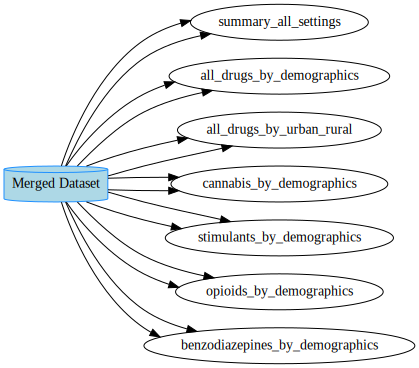

In [ ]:
from graphviz import Digraph

# Create a horizontal diagram with styled nodes
dot = Digraph(graph_attr={'rankdir': 'LR'})  # Left-to-right layout

# Main merged dataset (root node)
dot.node('Merged', 'Merged Dataset',
         shape='cylinder', color='dodgerblue', style='filled', fillcolor='lightblue')

# Add all renamed tables with conditional formatting
for table_name in renamed_figure_tables:
    dot.node(table_name, table_name)  # Inherits global node style
    dot.edge('Merged', table_name)

    # Connect to main dataset
    dot.edge('Merged', table_name)

# Save and display
dot.render('drug_data_flow', format='png', cleanup=True)
dot

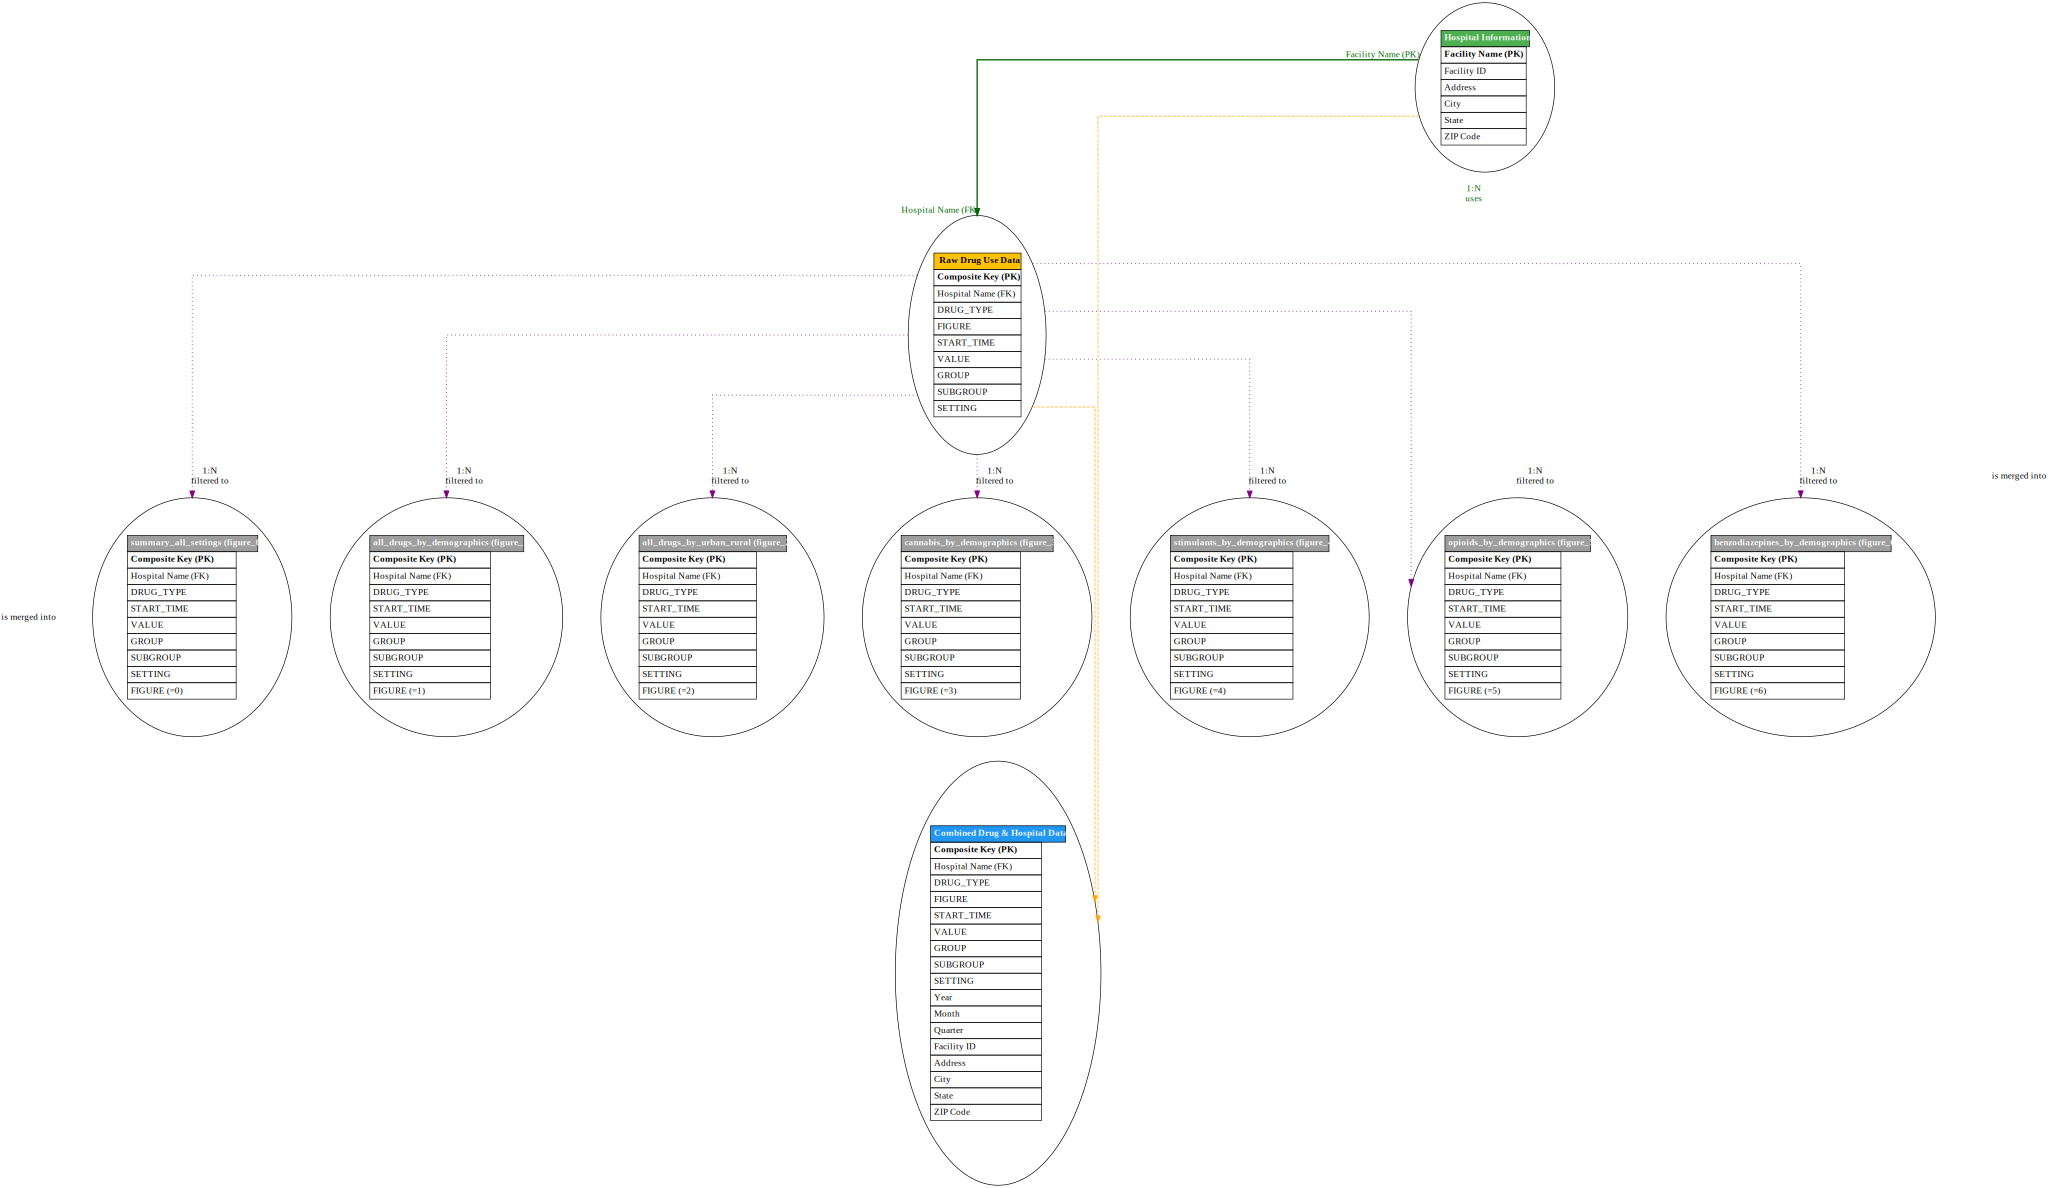

In [ ]:
from graphviz import Digraph

# Create a Digraph object for the ERD
# 'TB' means Top-to-Bottom layout, 'ortho' makes lines straight (orthogonal)
dot = Digraph(comment='Healthcare Data ERD', graph_attr={'rankdir': 'TB', 'splines': 'ortho', 'overlap': 'false', 'nodesep': '0.8'})

# Define a standard node style for tables using HTML-like labels for better structure
table_node_style = 'shape=plain'

# --- Define Nodes for Tables ---

# Hospital Information Table (hospital_df)
# We assume 'Facility Name' acts as a Primary Key for merging purposes.
dot.node('HospitalInfo', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR><TD COLSPAN="2" BGCOLOR="#4CAF50"><B><FONT COLOR="WHITE">Hospital Information</FONT></B></TD></TR>
  <TR><TD ALIGN="LEFT"><B><U>Facility Name (PK)</U></B></TD></TR>
  <TR><TD ALIGN="LEFT">Facility ID</TD></TR>
  <TR><TD ALIGN="LEFT">Address</TD></TR>
  <TR><TD ALIGN="LEFT">City</TD></TR>
  <TR><TD ALIGN="LEFT">State</TD></TR>
  <TR><TD ALIGN="LEFT">ZIP Code</TD></TR>
</TABLE>>''', style=table_node_style)

# Raw Drug Use Data Table (drug_df)
# This table doesn't have a single simple primary key, so we'll use a "Composite Key"
# 'Hospital Name' is added by you and acts as a Foreign Key to Hospital Information.
dot.node('RawDrugData', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR><TD COLSPAN="2" BGCOLOR="#FFC107"><B><FONT COLOR="BLACK">Raw Drug Use Data</FONT></B></TD></TR>
  <TR><TD ALIGN="LEFT"><B><U>Composite Key (PK)</U></B></TD></TR>
  <TR><TD ALIGN="LEFT">Hospital Name (FK)</TD></TR>
  <TR><TD ALIGN="LEFT">DRUG_TYPE</TD></TR>
  <TR><TD ALIGN="LEFT">FIGURE</TD></TR>
  <TR><TD ALIGN="LEFT">START_TIME</TD></TR>
  <TR><TD ALIGN="LEFT">VALUE</TD></TR>
  <TR><TD ALIGN="LEFT">GROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SUBGROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SETTING</TD></TR>
</TABLE>>''', style=table_node_style)

# Combined Drug & Hospital Data (merged_df)
# This table contains all columns from both 'drug_df' and 'hospital_df'.
# 'Hospital Name' here is still a Foreign Key linking back to the Hospital Information.
dot.node('MergedData', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR><TD COLSPAN="2" BGCOLOR="#2196F3"><B><FONT COLOR="WHITE">Combined Drug &amp; Hospital Data</FONT></B></TD></TR>
  <TR><TD ALIGN="LEFT"><B><U>Composite Key (PK)</U></B></TD></TR>
  <TR><TD ALIGN="LEFT">Hospital Name (FK)</TD></TR>
  <TR><TD ALIGN="LEFT">DRUG_TYPE</TD></TR>
  <TR><TD ALIGN="LEFT">FIGURE</TD></TR>
  <TR><TD ALIGN="LEFT">START_TIME</TD></TR>
  <TR><TD ALIGN="LEFT">VALUE</TD></TR>
  <TR><TD ALIGN="LEFT">GROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SUBGROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SETTING</TD></TR>
  <TR><TD ALIGN="LEFT">Year</TD></TR>
  <TR><TD ALIGN="LEFT">Month</TD></TR>
  <TR><TD ALIGN="LEFT">Quarter</TD></TR>
  <TR><TD ALIGN="LEFT">Facility ID</TD></TR>
  <TR><TD ALIGN="LEFT">Address</TD></TR>
  <TR><TD ALIGN="LEFT">City</TD></TR>
  <TR><TD ALIGN="LEFT">State</TD></TR>
  <TR><TD ALIGN="LEFT">ZIP Code</TD></TR>
</TABLE>>''', style=table_node_style)

# Renamed Figure Tables (subsets of Raw Drug Use Data)
# These tables inherit keys and columns from 'Raw Drug Use Data'.
renamed_figure_tables_mapping = {
    "summary_all_settings": "figure_0",
    "all_drugs_by_demographics": "figure_1",
    "all_drugs_by_urban_rural": "figure_2",
    "cannabis_by_demographics": "figure_3",
    "stimulants_by_demographics": "figure_4",
    "opioids_by_demographics": "figure_5",
    "benzodiazepines_by_demographics": "figure_6",
}

for friendly_name, original_fig_name in renamed_figure_tables_mapping.items():
    dot.node(friendly_name, f'''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
  <TR><TD COLSPAN="2" BGCOLOR="#9E9E9E"><B><FONT COLOR="WHITE">{friendly_name} ({original_fig_name})</FONT></B></TD></TR>
  <TR><TD ALIGN="LEFT"><B><U>Composite Key (PK)</U></B></TD></TR>
  <TR><TD ALIGN="LEFT">Hospital Name (FK)</TD></TR>
  <TR><TD ALIGN="LEFT">DRUG_TYPE</TD></TR>
  <TR><TD ALIGN="LEFT">START_TIME</TD></TR>
  <TR><TD ALIGN="LEFT">VALUE</TD></TR>
  <TR><TD ALIGN="LEFT">GROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SUBGROUP</TD></TR>
  <TR><TD ALIGN="LEFT">SETTING</TD></TR>
  <TR><TD ALIGN="LEFT">FIGURE (={original_fig_name.split('_')[1]})</TD></TR>
</TABLE>>''', style=table_node_style)

# --- Define Relationships (Edges) ---

# Relationship: Hospital Information (PK) to Raw Drug Data (FK)
# '1:N' indicates one hospital can have many drug use records.
dot.edge('HospitalInfo', 'RawDrugData', label='1:N\nuses', headlabel='Hospital Name (FK)', taillabel='Facility Name (PK)', color='darkgreen', fontcolor='darkgreen', penwidth='2')

# Relationship: Raw Drug Data and Hospital Info are combined to form Merged Data
dot.edge('RawDrugData', 'MergedData', label='is merged into', color='orange', style='dashed', dir='forward', minlen='2')
dot.edge('HospitalInfo', 'MergedData', label='is merged into', color='orange', style='dashed', dir='forward', minlen='2')

# Relationship: Raw Drug Data to Renamed Figure Tables (subsets)
# 'N:1' indicates many records in raw data form one subset.
for friendly_name, _ in renamed_figure_tables_mapping.items():
    dot.edge('RawDrugData', friendly_name, label='1:N\nfiltered to', color='purple', style='dotted', penwidth='1.5')

# Render the diagram to a PNG file
dot.render('healthcare_erd', format='png', cleanup=True)

dot


In [ ]:
import pandas as pd
import sqlite3
import plotly.express as px
import plotly.io as pio
import numpy as np # Import numpy for the hospital name assignment

# Set default Plotly template for consistent aesthetics
pio.templates.default = "plotly_white"

# --- 1. Load your original data (REPEATED FOR SELF-SUFFICIENCY) ---
url = "https://raw.githubusercontent.com/Vaibhav0000/healthcare-bi-project/main/Drug_Use_Data_from_Selected_Hospitals.csv"
hospital_url = "https://raw.githubusercontent.com/Vaibhav0000/healthcare-bi-project/main/Hospital_General_Information.csv"

hospital_df = pd.read_csv(hospital_url)
drug_df = pd.read_csv(url)

# --- Structured Artificial Assignment of 'Hospital Name' (REPEATED FOR SELF-SUFFICIENCY) ---
unique_hospital_names = hospital_df['Facility Name'].unique()
num_drug_records = len(drug_df)
num_hospitals = len(unique_hospital_names)

structured_fake_names = np.tile(unique_hospital_names, int(np.ceil(num_drug_records / num_hospitals)))[:num_drug_records]
drug_df['Hospital Name'] = structured_fake_names[np.random.permutation(num_drug_records)]

# --- Add a Surrogate Primary Key to drug_df (REPEATED FOR SELF-SUFFICIENCY) ---
drug_df['DrugRecordID'] = range(1, len(drug_df) + 1)


# --- 2. Create a SQLite database connection ---
conn = sqlite3.connect('healthcare_data.db')
cursor = conn.cursor()

# --- 3. Load Pandas DataFrames into SQLite tables (REPEATED FOR SELF-SUFFICIENCY) ---

# Load hospital_df into 'hospital_info' table
hospital_df.to_sql('hospital_info', conn, if_exists='replace', index=False)
print("\n'hospital_info' table created in SQLite.")

# Load drug_df into 'drug_data' table
cursor.execute("DROP TABLE IF EXISTS drug_data;") # Drop existing table if it was created by to_sql without PK
cursor.execute("""
CREATE TABLE drug_data (
    "DrugRecordID" INTEGER PRIMARY KEY AUTOINCREMENT, -- Define as PK and auto-incrementing
    "FIGURE" INTEGER,
    "SETTING" TEXT,
    "INDICATOR" TEXT,
    "GROUP" TEXT,
    "SUBGROUP" TEXT,
    "TIME" INTEGER,
    "START_TIME" TEXT,
    "END_TIME" TEXT,
    "VALUE" REAL,
    "MEASURE" TEXT,
    "Hospital Name" TEXT
);
""")
# Now insert data into the newly created table
drug_df.to_sql('drug_data', conn, if_exists='append', index=False, dtype={'DrugRecordID': 'INTEGER'})
print("'drug_data' table created with 'DrugRecordID' as PRIMARY KEY and structured 'Hospital Name' assignments.")


# --- Ensure merged_data_view is created (important if connection was new or reset) ---
create_merged_view_sql = """
CREATE TEMP VIEW IF NOT EXISTS merged_data_view AS
SELECT
    dd."DrugRecordID",
    dd.FIGURE,
    dd.SETTING,
    dd.INDICATOR,
    dd."GROUP",
    dd.SUBGROUP,
    dd.TIME,
    dd.START_TIME,
    dd.END_TIME,
    dd.VALUE,
    dd.MEASURE,
    dd."Hospital Name",
    hi."Facility ID",
    hi.Address,
    hi."City/Town",
    hi.State,
    hi."ZIP Code"
FROM
    drug_data AS dd
LEFT JOIN
    hospital_info AS hi ON dd."Hospital Name" = hi."Facility Name";
"""
cursor.execute(create_merged_view_sql)
print("Ensured 'merged_data_view' exists for EDA.")

# Load the full merged data into a Pandas DataFrame
sql_select_merged_data = "SELECT * FROM merged_data_view;"
merged_df_sql = pd.read_sql_query(sql_select_merged_data, conn)

# Process 'START_TIME', 'END_TIME' and extract time features (as already done)
merged_df_sql['START_TIME'] = pd.to_datetime(merged_df_sql['START_TIME'], errors='coerce')
merged_df_sql['END_TIME'] = pd.to_datetime(merged_df_sql['END_TIME'], errors='coerce') # Ensure END_TIME is datetime
merged_df_sql['Year'] = merged_df_sql['START_TIME'].dt.year
merged_df_sql['Month'] = merged_df_sql['START_TIME'].dt.month
merged_df_sql['Quarter'] = merged_df_sql['START_TIME'].dt.to_period('Q')
merged_df_sql['DURATION_DAYS'] = (merged_df_sql['END_TIME'] - merged_df_sql['START_TIME']).dt.days

# Handle 'Overall Summary' missing values from previous step
merged_df_sql.loc[merged_df_sql['FIGURE'] == 0, ['INDICATOR', 'GROUP', 'SUBGROUP']] = \
    merged_df_sql.loc[merged_df_sql['FIGURE'] == 0, ['INDICATOR', 'GROUP', 'SUBGROUP']].fillna('Overall Summary')


print("\n--- Visualizing Key Data Insights ---")

# --- Plot 1: Total Drug Use Trends Over Time (by Quarter) ---
# Aggregate data by Quarter and INDICATOR for line plot
# Exclude 'Overall Summary' from INDICATOR for specific drug trends
quarterly_trends = merged_df_sql[merged_df_sql['INDICATOR'] != 'Overall Summary'].groupby(
    ['Quarter', 'INDICATOR']
)['VALUE'].sum().reset_index()

# Convert Quarter back to string for Plotly to treat as discrete categories for labeling
quarterly_trends['Quarter_Str'] = quarterly_trends['Quarter'].astype(str)

fig1 = px.line(
    quarterly_trends,
    x='Quarter_Str',
    y='VALUE',
    color='INDICATOR',
    title='Total Drug Use Trends Over Time by Indicator',
    labels={'VALUE': 'Total Value', 'Quarter_Str': 'Quarter'},
    hover_data={'Quarter_Str': True, 'VALUE': ':.2f'} # Corrected hover_data
)
fig1.update_xaxes(type='category') # Ensures quarters are treated as distinct categories
fig1.show()


# --- Plot 2: Top 10 Indicators by Total Value ---
# Aggregate by INDICATOR and filter out 'Overall Summary'
top_indicators = merged_df_sql[merged_df_sql['INDICATOR'] != 'Overall Summary'].groupby('INDICATOR')[
    'VALUE'
].sum().nlargest(10).reset_index()

fig2 = px.bar(
    top_indicators,
    x='VALUE',
    y='INDICATOR',
    orientation='h',
    title='Top 10 Drug Indicators by Total Value',
    labels={'VALUE': 'Total Value', 'INDICATOR': 'Drug Indicator'},
    color='VALUE', # Color by value for visual emphasis
    color_continuous_scale=px.colors.sequential.Viridis
)
fig2.update_layout(yaxis={'categoryorder': 'total ascending'}) # Order bars by value
fig2.show()


# --- Plot 3: Drug Use Distribution by Setting (ED vs. IP) ---
# Aggregate by SETTING and INDICATOR
setting_distribution = merged_df_sql[merged_df_sql['INDICATOR'] != 'Overall Summary'].groupby(
    ['SETTING', 'INDICATOR']
)['VALUE'].sum().reset_index()

fig3 = px.bar(
    setting_distribution,
    x='INDICATOR',
    y='VALUE',
    color='SETTING',
    barmode='group', # Puts bars side-by-side
    title='Drug Use by Indicator and Setting (Emergency Dept vs. Inpatient)',
    labels={'VALUE': 'Total Value', 'INDICATOR': 'Drug Indicator', 'SETTING': 'Setting Type'}
)
fig3.update_xaxes(tickangle=-45) # Angle labels for readability
fig3.show()


# --- Plot 4: Drug Use by State (Top 15) ---
# Aggregate by State (using the merged_df_sql directly)
state_agg = merged_df_sql[merged_df_sql['INDICATOR'] != 'Overall Summary'].groupby('State')[
    'VALUE'
].sum().nlargest(15).reset_index()

fig4 = px.choropleth(
    state_agg,
    locations='State',
    locationmode='USA-states', # Assuming USA states based on data, adjust if international
    color='VALUE',
    scope='usa', # Focus on the USA map
    color_continuous_scale="Plasma",
    title='Top 15 States by Total Drug Use Value',
    labels={'VALUE': 'Total Value'}
)
fig4.show()

# --- Plot 5: Value Distribution (Box Plot) ---
# Helps visualize the spread and outliers of the VALUE column.
fig5 = px.box(
    merged_df_sql,
    y='VALUE',
    title='Distribution of Drug Use Values',
    labels={'VALUE': 'Drug Use Value'}
)
fig5.show()

# --- Plot 6: Average DURATION_DAYS by INDICATOR (Top 10) ---
# Analyze if certain indicators have longer/shorter reporting durations
avg_duration_by_indicator = merged_df_sql[merged_df_sql['INDICATOR'] != 'Overall Summary'].groupby('INDICATOR')[
    'DURATION_DAYS'
].mean().nlargest(10).reset_index()

fig6 = px.bar(
    avg_duration_by_indicator,
    x='DURATION_DAYS',
    y='INDICATOR',
    orientation='h',
    title='Top 10 Drug Indicators by Average Reporting Duration (Days)',
    labels={'DURATION_DAYS': 'Average Duration (Days)', 'INDICATOR': 'Drug Indicator'},
    color='DURATION_DAYS',
    color_continuous_scale=px.colors.sequential.Plotly3
)
fig6.update_layout(yaxis={'categoryorder': 'total ascending'})
fig6.show()


# --- Important: Close the database connection when all operations are complete ---
conn.close()
print("\nDatabase connection closed after EDA visualizations.")



'hospital_info' table created in SQLite.
'drug_data' table created with 'DrugRecordID' as PRIMARY KEY and structured 'Hospital Name' assignments.
Ensured 'merged_data_view' exists for EDA.

--- Visualizing Key Data Insights ---



Database connection closed after EDA visualizations.
